<a href="https://colab.research.google.com/github/yanviegas/eu_na_imersao_dados_2020_2/blob/main/aula_04_imersao_dados_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Evento **IMERSÃO DADOS 2020.2**, organizado pela Alura Cursos Online

O Projeto teve como objetivo entender na prática um pouco sobre as habilidades, o trabalho e a carreira do profissional da área de Ciência de Dados, usando como trilha a análise de uma amostra dos dados do ENEM 2019.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados["NU_NOTA_SOMA_TOTAL"] = dados[provas].sum(axis = 1)
provas.append("NU_NOTA_SOMA_TOTAL")
dados_sem_notas_nulas = dados.query("NU_NOTA_SOMA_TOTAL != 0")

#**AULA 04: MODELOS DE MACHINE LEARNING**



In [15]:
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_SOMA_TOTAL']

In [16]:
dados_sem_notas_nulas[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_SOMA_TOTAL
0,435.6,512.3,432.4,488.6,420.0,2288.9
1,NaN,409.3,NaN,375.3,400.0,1184.6
2,423.2,499.1,427.2,441.0,560.0,2350.5
3,426.2,578.1,499.9,551.5,500.0,2555.7
4,516.5,571.3,424.5,511.2,780.0,2803.5
...,...,...,...,...,...,...
127375,502.4,559.6,539.7,525.7,740.0,2867.4
127376,449.1,380.9,418.2,450.3,520.0,2218.5
127377,NaN,516.0,NaN,497.9,440.0,1453.9
127378,564.7,416.2,455.7,517.3,620.0,2573.9


In [17]:
sem_nan_dados_sem_notas_nulas = dados_sem_notas_nulas[provas].dropna()
sem_nan_dados_sem_notas_nulas

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_SOMA_TOTAL
0,435.6,512.3,432.4,488.6,420.0,2288.9
2,423.2,499.1,427.2,441.0,560.0,2350.5
3,426.2,578.1,499.9,551.5,500.0,2555.7
4,516.5,571.3,424.5,511.2,780.0,2803.5
5,559.6,618.7,615.6,607.5,900.0,3301.4
...,...,...,...,...,...,...
127373,480.4,501.5,386.7,485.3,520.0,2373.9
127375,502.4,559.6,539.7,525.7,740.0,2867.4
127376,449.1,380.9,418.2,450.3,520.0,2218.5
127378,564.7,416.2,455.7,517.3,620.0,2573.9


In [18]:
provas_entrada = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']
provas_saida = ['NU_NOTA_MT']
notas_entrada = sem_nan_dados_sem_notas_nulas[provas_entrada]
notas_saida = sem_nan_dados_sem_notas_nulas[provas_saida]

In [19]:
notas_entrada

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
0,435.6,512.3,488.6
2,423.2,499.1,441.0
3,426.2,578.1,551.5
4,516.5,571.3,511.2
5,559.6,618.7,607.5
...,...,...,...
127373,480.4,501.5,485.3
127375,502.4,559.6,525.7
127376,449.1,380.9,450.3
127378,564.7,416.2,517.3


In [20]:
notas_saida

,NU_NOTA_MT
0,432.4
2,427.2
3,499.9
4,424.5
5,615.6
...,...
127373,386.7
127375,539.7
127376,418.2
127378,455.7


In [21]:
import numpy as np
x = notas_entrada
y = np.ravel(notas_saida)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
seed = 28
x_tr, x_tes, y_tr, y_tes = train_test_split(x, y, test_size = 0.20, random_state = seed)
modelo = LinearSVR(random_state = seed)
modelo.fit(x_tr, y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=28, tol=0.0001, verbose=0)

In [23]:
predictions_mt = modelo.predict(x_tes)
predictions_mt

array([540.8382049 , 779.87834809, 677.40207144, ..., 645.77093984,
       695.97629947, 639.91234836])

In [24]:
y_tes[:11]

array([398.3, 694.1, 589.3, 414.5, 462.6, 570.6, 380.5, 373.6, 400.2,
       414.1, 739. ])

(-50.0, 1050.0)

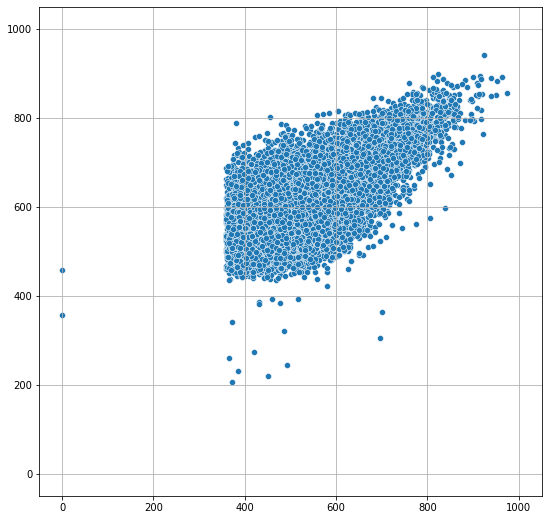

In [25]:
plt.figure(figsize = (9, 9)); plt.grid(True)
sns.scatterplot(x = y_tes, y = predictions_mt)
plt.xlim(-50, 1050); plt.ylim(-50, 1050)

(-600.0, 600.0)

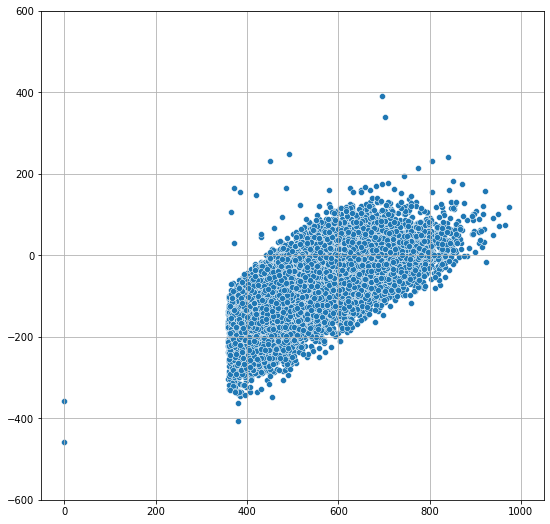

In [26]:
plt.figure(figsize = (9, 9)), plt.grid(True)
sns.scatterplot(x = y_tes, y = y_tes - predictions_mt)
plt.xlim(-50, 1050); plt.ylim(-600, 600)

In [27]:
resultados = pd.DataFrame()
resultados['Observado'] = y_tes
resultados['Previsoes'] = predictions_mt
resultados['Delta'] = resultados['Observado'] - resultados['Previsoes']
resultados['Quadrado da Diferenca'] = (resultados['Delta'])**2
resultados

,Observado,Previsoes,Delta,Quadrado da Diferenca
0,398.3,540.838205,-142.538205,20317.139857
1,694.1,779.878348,-85.778348,7357.925001
2,589.3,677.402071,-88.102071,7761.974992
3,414.5,574.038427,-159.538427,25452.509819
4,462.6,565.573757,-102.973757,10603.594549
...,...,...,...,...
18503,505.4,516.106549,-10.706549,114.630187
18504,517.7,743.996805,-226.296805,51210.243786
18505,380.8,645.770940,-264.970940,70209.598958
18506,574.6,695.976299,-121.376299,14732.206074


In [28]:
print(resultados['Quadrado da Diferenca'].mean(), 
      "\t", 
      resultados['Quadrado da Diferenca'].median())

14678.163832447986 	 9102.57860687183


In [29]:
print((resultados['Quadrado da Diferenca'].mean())**0.5)

121.15347222613137


In [30]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_tr, y_tr)
dummy_predictions = modelo_dummy.predict(x_tes)
dummy_predictions

array([523.65690743, 523.65690743, 523.65690743, ..., 523.65690743,
       523.65690743, 523.65690743])

In [31]:
mean_squared_error(y_tes, dummy_predictions)

11998.030581360383

In [32]:
mean_squared_error(y_tes, predictions_mt)

14678.163832448041

#A04. Desafio 01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula.

In [33]:
#Regressão Linear tipo Lasso
from sklearn import linear_model
modelo_lasso = linear_model.Lasso(alpha=0.1)
modelo_lasso.fit(x_tr, y_tr)
lasso_predictions = modelo_lasso.predict(x_tes)
lasso_predictions

array([452.889733  , 676.98440268, 580.19196404, ..., 550.16624786,
       597.6310867 , 544.80907137])

In [34]:
mean_squared_error(y_tes, lasso_predictions)

6052.249284757662

(-50.0, 1050.0)

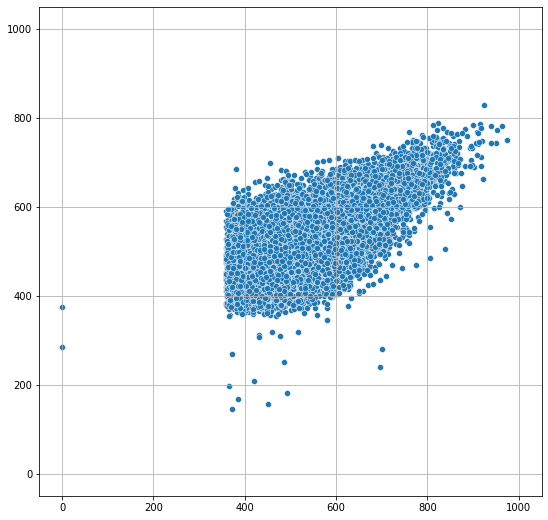

In [35]:
plt.figure(figsize = (9, 9)), plt.grid(True)
sns.scatterplot(x = y_tes, y = lasso_predictions)
plt.xlim(-50, 1050); plt.ylim(-50, 1050)

In [36]:
#Regressão Bayesiana
from sklearn import linear_model
modelo_bayes = linear_model.BayesianRidge()
modelo_bayes.fit(x_tr, y_tr)
bayes_predictions = modelo_bayes.predict(x_tes)
bayes_predictions

array([452.89131904, 676.97962057, 580.19250293, ..., 550.16900885,
       597.63099815, 544.8113439 ])

In [37]:
mean_squared_error(y_tes, bayes_predictions)

6052.246191169364

(-50.0, 1050.0)

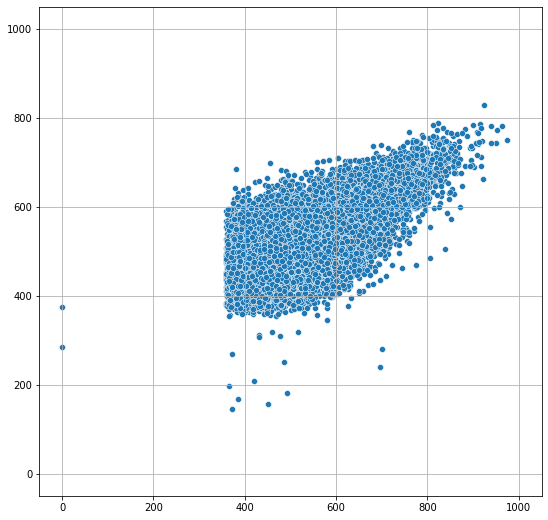

In [38]:
plt.figure(figsize = (9, 9)), plt.grid(True)
sns.scatterplot(x = y_tes, y = bayes_predictions)
plt.xlim(-50, 1050); plt.ylim(-50, 1050)

#A04. Desafio 02: Ler a documentação do DummyRegressor e alterar o método de regressão.

In [39]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
modelo_dummy = DummyRegressor(strategy = 'median')
modelo_dummy.fit(x_tr, y_tr)
dummy_predictions = modelo_dummy.predict(x_tes)
mean_squared_error(y_tes, dummy_predictions)

12483.555725091852

In [40]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
modelo_dummy = DummyRegressor(strategy = "quantile", quantile = 0.28)
modelo_dummy.fit(x_tr, y_tr)
dummy_predictions = modelo_dummy.predict(x_tes)
mean_squared_error(y_tes, dummy_predictions)

18580.945003241846

#A04. Desafio 03: Buscar outra métrica para avaliar modelos de regressão.

In [41]:
from sklearn.metrics import mean_poisson_deviance
mean_poisson_deviance(y_tes, predictions_mt)

26.2872723408292

In [42]:
from sklearn.metrics import mean_poisson_deviance
mean_poisson_deviance(y_tes, dummy_predictions)

36.28097703356028

In [43]:
from sklearn.metrics import mean_poisson_deviance
mean_poisson_deviance(y_tes, lasso_predictions)

11.582628647571713

In [44]:
from sklearn.metrics import mean_poisson_deviance
mean_poisson_deviance(y_tes, bayes_predictions)

11.582606261374945